# Introduction to Statistical Inference

In this session we introduce statistical inference. Statistical inference consists in assuming a probabilistic model as the generating process of real-world observations. Based on those observations, we infer some parameters of the probabilistic model. This allows us to make predictions for new observations.

Let us look at an example. We consider flight delay data. In terms of applications, we might want to propose flight delay insurance. This would require to determine the probability distribution of delays. 
Let's take a look at a dataset of flight delays in the USA.

In [23]:
import pandas as pd
from pathlib import Path

import kagglehub

# Download latest version
path = kagglehub.dataset_download("usdot/flight-delays")

path = Path(path)
files = list(path.iterdir())

In [24]:
data = pd.read_csv(path / 'flights.csv', nrows=10000)
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2015,1,1,4,HA,165,N492HA,OGG,HNL,1705,...,1757.0,17.0,0,0,NaN,0.0,0.0,7.0,10.0,0.0
9996,2015,1,1,4,MQ,3046,N610MQ,DBQ,ORD,1705,...,1743.0,-32.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9997,2015,1,1,4,MQ,3048,N679MQ,ORD,CMI,1705,...,1814.0,26.0,0,0,NaN,10.0,0.0,5.0,11.0,0.0
9998,2015,1,1,4,MQ,3118,N512MQ,MDT,ORD,1705,...,2131.0,196.0,0,0,NaN,21.0,0.0,112.0,63.0,0.0


In particular, we are interested in a specific column: ARRIVAL_DELAY. We select non-negative delays (negative delays correspond to the flight reaching its destination earlier than scheduled), and for convenience we also remove data where the delay was greater than 120 minutes.

In [2]:
subdata = data[['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY']][(data.ARRIVAL_DELAY > 0) & (data.ARRIVAL_DELAY < 120)]
subdata[:20]

,MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY
2,1,4,SFO,CLT,5.0
5,1,4,SFO,MSP,8.0
14,1,4,SEA,MSP,8.0
20,1,4,LAS,MCI,6.0
21,1,4,SEA,MIA,1.0
27,1,4,MSP,FLL,25.0
29,1,4,DEN,MIA,2.0
30,1,4,PHX,ORD,43.0
33,1,4,SLC,ATL,10.0
35,1,4,LAS,HNL,15.0


We can get a first qualitative understanding of the distribution of flight delays by using a histogram. Here the histogram is rescaled from counts to density, so that later on we can compare with candidate probability density functions.

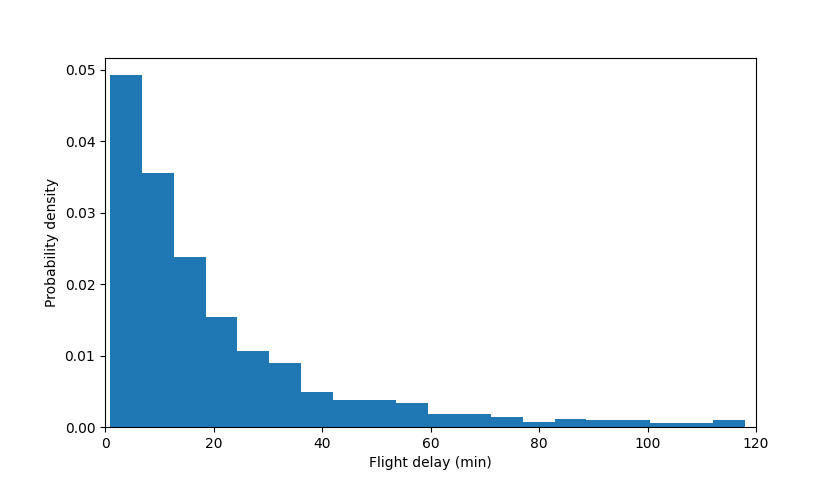

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt

plt.figure(figsize=(8.4, 4.8))
_ = plt.hist(subdata.ARRIVAL_DELAY, log=False, bins=20, density=True)
plt.xlim(0, 120)
plt.xlabel('Flight delay (min)')
plt.ylabel('Probability density')
plt.show()

Remember the exponential distribution with parameter $\lambda$,

$f_X(x: \lambda) = \lambda \exp(-\lambda x), x\geq 0$

Here, $\lambda$ is the parameter of the distribution. For each value of $\lambda$, we get one probability density function. In the next widget, change the value of $\lambda$ on the slider to see how the probability density function changes.

In [9]:
from ipywidgets import widgets, interactive_output



class QuickWidget:
    def __init__(self, plot_func, title='', figsize=(8.4, 4.8)):
        self.plot_func = plot_func
        self.figure = plt.figure(figsize=figsize)
        self.ax = self.figure.add_subplot()
        self.title = title
        self.sliders = dict()

    def add_slider(self, min:float, max:float, value: float, step, param_name:str, param_description:str):
        slider = widgets.FloatSlider(description=param_description,
                                     min=min, max=max,
                                     value=value,
                                     step=step)
        self.sliders[param_name] = slider

    def set_xlim(self, *value):
        self.xlim = value

    def set_ylim(self, *value):
        self.ylim = value
    
    def _make_plot(self, *args, **kwargs):
        self.ax.clear()
        self.plot_func(self.ax, **kwargs)
        self.ax.set_xlim(*self.xlim)
        self.ax.set_ylim(*self.ylim)
        self.ax.set_ylabel(self.ylabel)
        self.ax.set_xlabel(self.xlabel)
        self.ax.set_title(self.title)
        
    def __call__(self):
        out = widgets.interactive_output(self._make_plot, self.sliders)
        return widgets.HBox([out, widgets.VBox(list(self.sliders.values()))])


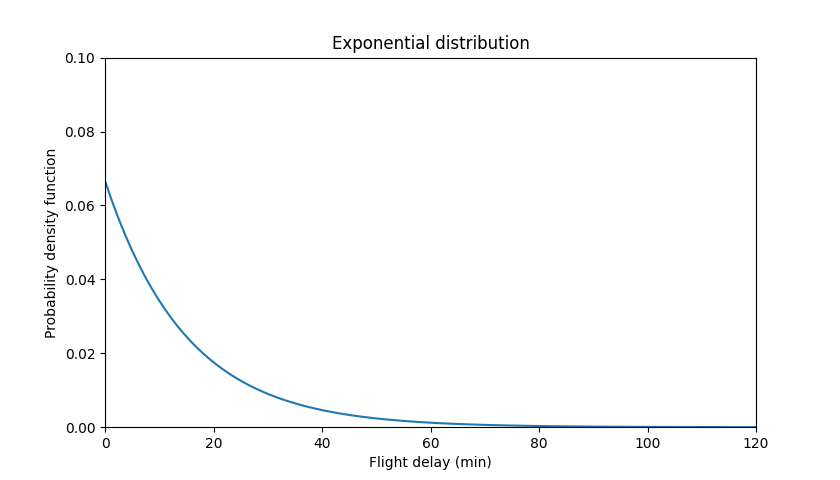

In [10]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

def plot_func1(ax, lambd):
    dist = expon(scale = 1 / lambd)
    xs = np.linspace(0, 120, 100)
    ys = dist.pdf(xs)
    ax.plot(xs, ys)

widget = QuickWidget(plot_func1, title='Exponential distribution')
widget.set_xlim(0, 120)
widget.set_ylim(0, 0.1)
widget.xlabel = 'Flight delay (min)'
widget.ylabel = 'Probability density function'
widget.add_slider(1 / 100, 1 / 10, 1 / 15, 0.01, 'lambd', 'lambda')
widget()

An exponential distribution is a reasonable choice for the modelling of flight delays. However, if we want to make predictions of flight delays, we need to infer the value of $\lambda$ that best matches our data. Let's look at this in a qualitative way first.

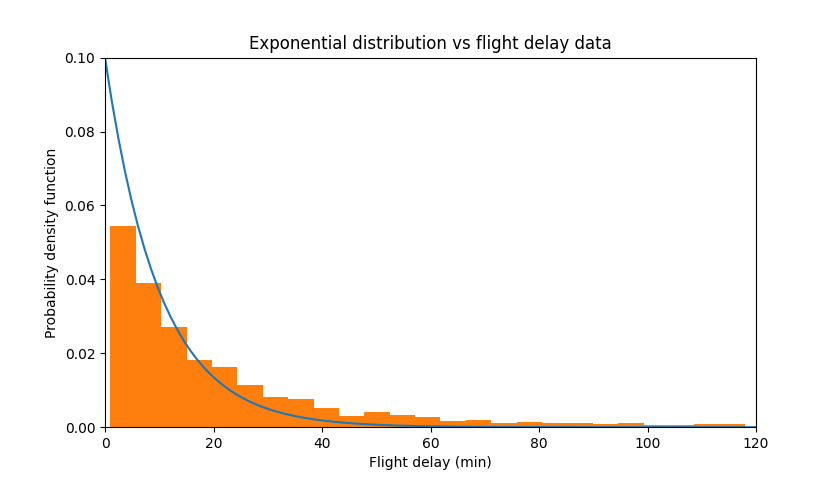

In [11]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

def plot_func(ax, lambd):
    dist = expon(scale = 1 / lambd)
    xs = np.linspace(0, 120, 100)
    ys = dist.pdf(xs)
    ax.plot(xs, ys)
    ax.hist(subdata.ARRIVAL_DELAY, bins=25, density=True)

widget = QuickWidget(plot_func, title='Exponential distribution vs flight delay data')
widget.set_xlim(0, 120)
widget.set_ylim(0, 0.1)
widget.xlabel = 'Flight delay (min)'
widget.ylabel = 'Probability density function'
widget.add_slider(1 / 100, 1 / 10, 1 / 10, 0.01, 'lambd', 'lambda')
widget()

Our first objective is to fit our model to the data. Here what this means is finding the value of $\lambda$ that best matches the dataset.
We are going to investigate two standard approaches for this type of problem.

## Method of moments

Remember, in our previous example, having assumed that flight delays follow an exponential distribution, we wish to infer the parameter value $\lambda$ from the dataset.

The method of moments is a rather simple approach to this inference problem. The basic idea is as follows:
1. Obtain the sample mean of the data
2. Find the parameter value $\lambda$ such that the expectation is equal to the sample mean in 1.

The next widget shows this in a qualitative way: the red star is the sample mean of the data. It does not change. The bue star is the expectation of the exponential distribution with parameter $\lambda$. It changes as $\lambda$ changes. We estimate $\lambda$ by finding the value for which the blue star matches the red star.

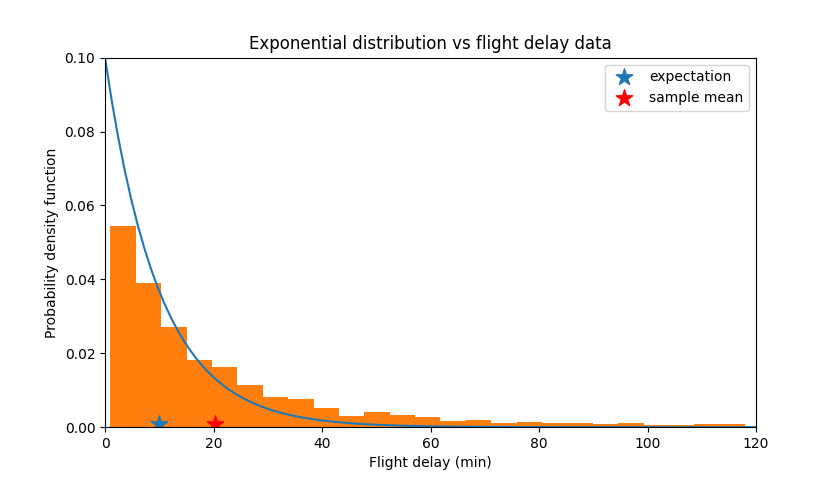

In [21]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

def plot_func(ax, lambd):
    ax.clear()
    dist = expon(scale = 1 / lambd)
    xs = np.linspace(0, 120, 100)
    ys = dist.pdf(xs)
    ax.plot(xs, ys)
    ax.hist(subdata.ARRIVAL_DELAY, bins=25, density=True)
    ax.scatter(1 / lambd, 0.001, s=155, marker='*', label='expectation')
    ax.scatter(np.mean(subdata.ARRIVAL_DELAY), 0.001, s=155, c='red', marker='*', label='sample mean')
    ax.legend()

widget = QuickWidget(plot_func, title='Exponential distribution vs flight delay data')
widget.set_xlim(0, 120)
widget.set_ylim(0, 0.1)
widget.xlabel = 'Flight delay (min)'
widget.ylabel = 'Probability density function'
widget.add_slider(1 / 100, 1 / 10, 1 / 10, 0.01, 'lambd', 'lambda')
widget()

Now let's do the same but in a quantitative way.

### Sample mean

The sample mean is just what you might also know as the average. If we denote our random sample $X_1, \ldots, X_n$, then the sample mean is simply,

\begin{equation}
\overline{X} = \frac{1}{n}\sum_{i=1}^n{X_i}.
\end{equation}

In Python, we can use the numpy.mean command, as follows to compute it for our data:

```python
xbar = np.mean(subdata.ARRIVAL_DELAY)
print(xbar)
```

In [18]:
xbar = np.mean(subdata.ARRIVAL_DELAY)
print(xbar)

20.36813808715337


### Mean function

We define the mean function as $\mu(\lambda) = E_{\lambda}[X]$, where $E_{\lambda}$ is the expectation but where we make the dependance on the parameter $\lambda$ explicit.
In more details,
\begin{equation}
    E_{\lambda}[X] = \int_{-\infty}^{\infty}{x f_X(x;\lambda)dx} = \int_{0}^{\infty}{x \lambda \exp(-\lambda x)dx}.
\end{equation}

We previously derived the expectation of the exponential distribution and had found that,

\begin{equation}
    \mu(\lambda) = \frac{1}{\lambda}.
\end{equation}

The Method of Moment estimator $\widehat{\lambda}$ is obtained by solving (in $\widehat{\lambda}$),

\begin{equation}
    \mu(\widehat{\lambda}) = \overline{X}. 
\end{equation}

Hence we simply get, in this case, 

\begin{equation}
    \widehat{\lambda} = \frac{1}{\overline{X}}.
\end{equation}

In Python,

```python
lambda_hat = 1 / np.mean(subdata.ARRIVAL_DELAY)
print(lambda_hat)
```

In [19]:
lambda_hat = 1 / np.mean(subdata.ARRIVAL_DELAY)
print(lambda_hat)

0.049096289298564896


Now based on this, we can answer questions like the following: 

1. What is the probability that a flight has a delay greater than one hour?
2. Assume we offer a flight insurance where we pay 50 pounds back for a flight delay greater than one hour. What is the equilibrium price we should sell our insurance for?
3. Assume we offer a flight insurance where we pay 1 pound per minute of delay. What is the equilibrium price we should sell our insurance for?
4. Assume we offer a flight insurance where we pay back $x^{1.1}$ pounds back for a delay of $x$ minutes. What is the equilibrium price?

## Maximum Likelihood Estimation

Section being updated...

The second standard method of estimation that we investigate is Maximum Likelihood Estimation. The method of Maximum Likelihood Estimation relies on the Likelihood function.

1. The likelihood function is a function of the parameters of the probability model. Here the exponential distribution has a single parameter, $\lambda$.
2. The likelihood function also depends on the observations. Here, the observations are the flight delays which we write as $x_1, x_2, \ldots, x_n$, with $n$ the total number of observations.

3. Under the assumption of i.i.d. (Independently and Identically Distributed) observations, the Likelihood function takes the following form:
\begin{align}
    L(\lambda; x_1, \ldots, x_n) &= \prod_{i=1}^{n}f_X(x_i;\lambda)\\
   &= f_X(x_1;\lambda) \times f_X(x_2;\lambda) \times \ldots \times f_X(x_n;\lambda)
\end{align}
4. The log likelihood function is defined as the logarithm of the likelihood function,
\begin{align}
    l(\lambda; x_1, \ldots, x_n) &= \log L(\lambda; x_1, \ldots, x_n)\\
   &= \sum_{i=1}^{n}\log f_X(x_i;\lambda)\\
\end{align}

Replacing with $f_X(x;\lambda)=\lambda\exp(-\lambda x)$ we get,

\begin{align}
    l(\lambda; x_1, \ldots, x_n) &= \sum_{i=1}^{n}
    \log
    \left\{
        \lambda\exp(-\lambda x)
    \right\}\\
    &=
    n \log \lambda - \lambda \sum_{i=1}^{n} x_i
\end{align}

Below we plot the log-likelihood function for the parameter $\lambda$ of the exponential distribution, computed on the flight delay dataset.

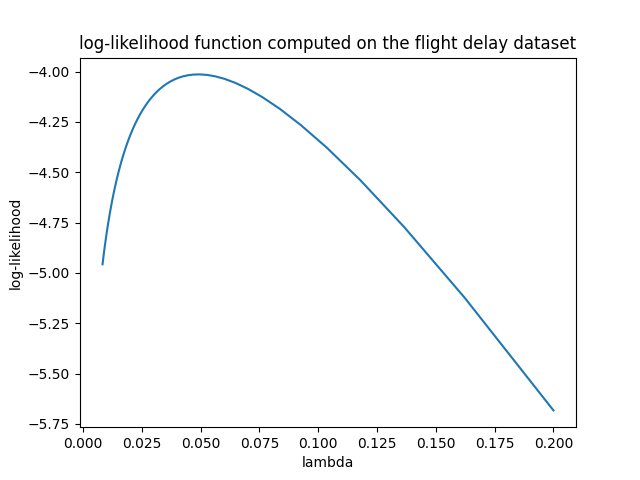

In [28]:
def plot_func(ax):
    ax.clear()
    xs = np.linspace(5, 120, 100).reshape((1, -1))
    ys = expon.pdf(xs)
    ax.plot(1 / xs.flatten(), np.mean(expon.logpdf(x=subdata.ARRIVAL_DELAY.to_numpy().reshape((-1, 1)), loc=np.zeros_like(xs), scale=xs), axis=0))
    ax.set_xlabel('lambda')
    ax.set_ylabel('log-likelihood')
    ax.set_title('log-likelihood function computed on the flight delay dataset')

fig = plt.figure()
ax = fig.add_subplot()
plot_func(ax)

We now have the tools to define Maximum Likelihood Estimation. The Maximum Likelihood Estimator is defined by the value $\widehat{\lambda}$ where the likelihood (or equivalently the log-likelihood) attains its maximum. In the figure above, we can see that $\widehat{\lambda}\approx 0.05$.

In practice, there are two ways to obtain the Maximum Likelihood Estimator:
1. Analytically: we will study this in class
2. Numerically: we use a numerical optimizer to approximately find where the likelihood function reaches its maximum

## Conclusion

The methods of inference presented here, while introduced for the specific case of the exponential distribution, are general. We will apply them in more advanced cases, for instance for distributions with several parameters (the exponential only has one, $\lambda$).